In [6]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()    #in between parenthesis, for Google Colab Notebook , use ctrl+shift+spacebar to see all pre-defined functions

In [9]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [10]:
from  sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [12]:
# housing.data has independent data amd housing.target has dependent dataset
# first, data is broken down into 'full training' and 'testing' data and then 'full training' data is broken down into 'training' data and 'validation' data(for hyperparameter tuning).

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#scaler will be used for standardisation so, we will do (x-(mean))/ (standard deviation) .
#scaler will use mean and standard deviation, will be trained/fit on the basis of training data.
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
X_train.shape

(11610, 8)

In [20]:
model= keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),       #As data has '8'input independent variables, each neuron has input shape of 8 as it takes these input.
    # above line can also be written as: 
    # keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:1])
    keras.layers.Dense(30,activation="relu") ,
    keras.layers.Dense(1)                                    # in output layer, we have only 1 neuron ,so, as it is regression.
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3),   #lr=learning rate ,by default, it is 0.01 , we have changed it.
              metrics=['mae'])    #mae= mean absolute error

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [27]:
model_history= model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid)) 

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [28]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3942 - mae: 0.4502


In [29]:
#first value is loss and second is mean absolute error as we had fed our data  in that way in model.compile above

In [30]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577126979827881,
  0.593418538570404,
  0.5557191371917725,
  0.5271905064582825,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.42605164647102356,
  0.42017653584480286,
  0.41549986600875854,
  0.41116511821746826,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.39796027541160583],
 'mae': [0.9900256991386414,
  0.6041509509086609,
  0.5618005990982056,
  0.5398454070091248,
  0.5237293243408203,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740883588790894,
  0.4636021554470062,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.4545365273952484,
  0.4521064758300781,
  0.45083147287368774],
 'val_loss': [0.7126054763793945,
  0.6880088448524475,
  0.5803285837173462,
  0.516608536243

In [31]:
# Above code gives all errors in form of a dictionary.

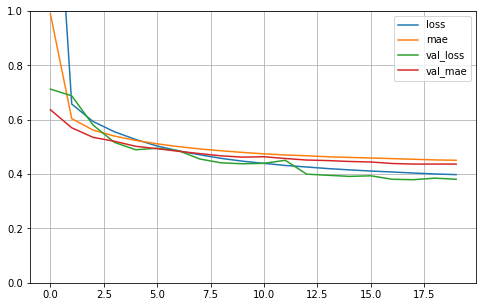

In [32]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [34]:
# Important conclusion from the above graph: As the graph is still going down, if we increase epochs or carry out the same operation on more epochs, our errors will be reduced.

In [35]:
X_new= X_test[:3]

In [37]:
y_pred= model.predict(X_new)
print(y_pred)

1/1 [==============================] - 0s 24ms/step
[[0.53287673]
 [1.8915398 ]
 [3.4040868 ]]


In [38]:
print(y_test[:3])

[0.477   0.458   5.00001]
